In [2]:
import pickle as pkl
import numpy as np
from matplotlib import pyplot as plt

In [16]:
with open('wafer_dict.pkl','rb') as f:
    wafer_dict = pkl.load(f)

print(wafer_dict['Pixel_A_0000'])

{'B0': {'+': {'Grouptype': 'RowPad', 'GroupIndex': 0, 'Group Section': 'A', 'Pad Label': 'B00+', 'Pad X center': -65256.616, 'Pad Y center': 1780.721, 'Pixel Row': 0, 'Pixel Column': 0, 'Pixel Ring': 0, 'Pixel Section': 'A', 'Pixel X center': -1529.978, 'Pixel Y center': 2650.0, 'Raw angle': 0.0, 'Actual angle': 2.0943951023931953, 'Signal description\n': 'NC\n'}, '-': {'Grouptype': 'RowPad', 'GroupIndex': 0, 'Group Section': 'A', 'Pad Label': 'B00-', 'Pad X center': -64927.886, 'Pad Y center': 1510.1, 'Pixel Row': 0, 'Pixel Column': 0, 'Pixel Ring': 0, 'Pixel Section': 'A', 'Pixel X center': -1529.978, 'Pixel Y center': 2650.0, 'Raw angle': 0.0, 'Actual angle': 2.0943951023931953, 'Signal description\n': 'NC\n'}}, 'T0': {'+': {'Grouptype': 'RowPad', 'GroupIndex': 0, 'Group Section': 'A', 'Pad Label': 'T00+', 'Pad X center': -65186.616, 'Pad Y center': 1901.965, 'Pixel Row': 0, 'Pixel Column': 0, 'Pixel Ring': 0, 'Pixel Section': 'A', 'Pixel X center': -1529.978, 'Pixel Y center': 2650

Dictionary format:

>Pixel name
>>Detector name
>>>Polarity (+ or i)
>>>>Fields from wafer csv file

pixel is  Pixel_A_0000
detector is  B0
Polarity is  +
Grouptype is  <class 'str'>
GroupIndex is  <class 'int'>
Group Section is  <class 'str'>
Pad Label is  <class 'str'>
Pad X center is  <class 'float'>
Pad Y center is  <class 'float'>
Pixel Row is  <class 'int'>
Pixel Column is  <class 'int'>
Pixel Ring is  <class 'int'>
Pixel Section is  <class 'str'>
Pixel X center is  <class 'float'>
Pixel Y center is  <class 'float'>
Raw angle is  <class 'float'>
Actual angle is  <class 'float'>
Signal description
 is  <class 'str'>
Polarity is  -
Grouptype is  <class 'str'>
GroupIndex is  <class 'int'>
Group Section is  <class 'str'>
Pad Label is  <class 'str'>
Pad X center is  <class 'float'>
Pad Y center is  <class 'float'>
Pixel Row is  <class 'int'>
Pixel Column is  <class 'int'>
Pixel Ring is  <class 'int'>
Pixel Section is  <class 'str'>
Pixel X center is  <class 'float'>
Pixel Y center is  <class 'float'>
Raw angle is  <class 'float'>
Actual angle is  <class 'float'>
Signal description
 i

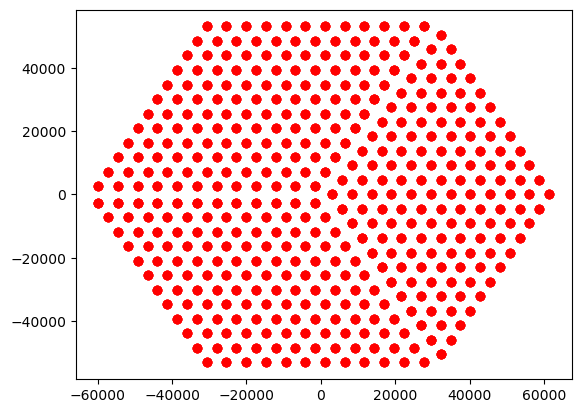

In [19]:
for pixel in wafer_dict.keys():
    print("pixel is ",pixel)
    for detector in wafer_dict[pixel].keys():
        print("detector is ",detector)

        plt.plot(wafer_dict[pixel][detector]['+']['Pixel X center'],
                 wafer_dict[pixel][detector]['+']['Pixel Y center'],'ro')
        
        for Polarity in wafer_dict[pixel][detector].keys():
           print("Polarity is ",Polarity)

           for Fields in wafer_dict[pixel][detector][Polarity].keys():
               print(f"{Fields} is ",type(wafer_dict[pixel][detector][Polarity][Fields]))
               
                  
    
               

432


(array([126.,   0.,   0.,   0.,   0., 144.,   0.,   0.,   0., 162.]),
 array([139.99951803, 139.99960463, 139.99969124, 139.99977784,
        139.99986444, 139.99995104, 140.00003765, 140.00012425,
        140.00021085, 140.00029745, 140.00038406]),
 <BarContainer object of 10 artists>)

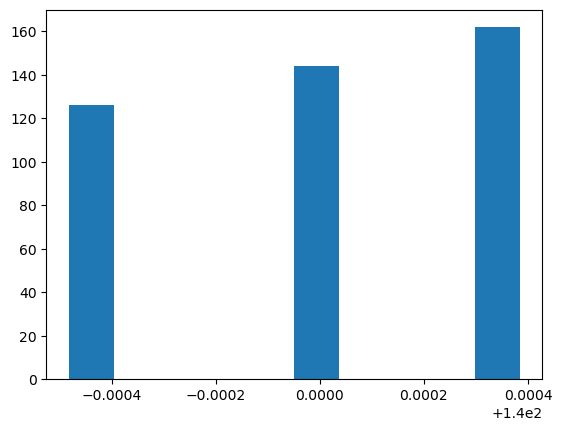

In [17]:
distances = []
for pixel in wafer_dict.keys():
    pad_locations = []
    for detector in wafer_dict[pixel].keys():
        pad_locations.append([wafer_dict[pixel][detector]['+']['Pad X center'],
                              wafer_dict[pixel][detector]['+']['Pad Y center']])

    diff_x = pad_locations[0][0] - pad_locations[1][0]
    diff_y = pad_locations[0][1] - pad_locations[1][1]
    distance = np.sqrt(diff_x**2 + diff_y**2)

    distances.append(distance)
    
print(len(distances))
plt.hist(distances)


In [8]:
pad_locations

[[-29913.842, -57404.248],
 [-30053.842, -57404.248],
 [-36296.616, -51940.913],
 [-36366.616, -51819.669]]

In [18]:
distance

140.0

(array([396.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  36.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 10 artists>)

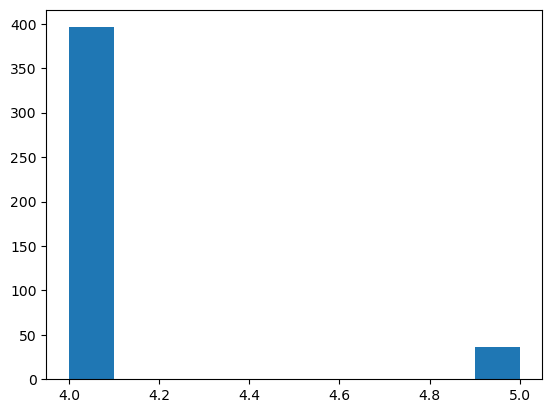

In [10]:
number_detectors = []
for pixel in wafer_dict.keys():
    detector_list = wafer_dict[pixel].keys()
    number_detectors.append(len(detector_list))

plt.hist(number_detectors)